In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# Read Data

In [2]:
salary_df = pd.read_csv("nba_2017_salary.csv");salary_df.head()


,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [3]:
pie_df = pd.read_csv("nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [4]:
plus_minus_df = pd.read_csv("nba_2017_real_plus_minus.csv")
plus_minus_df["NAME"] = plus_minus_df["NAME"].apply(lambda x: x.split(",")[0])
plus_minus_df.rename(columns = {"NAME" : "PLAYER"}, inplace = True)
plus_minus_df.head()

,PLAYER,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,LeBron James,CLE,74,37.8,6.49,1.93,8.42,20.43
1,Stephen Curry,GS,79,33.4,7.27,0.14,7.41,18.80
2,Jimmy Butler,CHI,76,37.0,4.82,1.80,6.62,17.35
3,Russell Westbrook,OKC,81,34.6,6.74,-0.47,6.27,17.34
4,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84


In [5]:
br_df = pd.read_csv("nba_2017_br.csv");br_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


# Clean Data

## player_df indicates players ability and salaries

In [6]:
players_df = br_df.copy()
players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
players_df = players_df.merge(plus_minus_df, how="inner", on="PLAYER")

In [7]:
players_df = players_df.merge(pie_df[["PLAYER", "PIE", "PACE", "W"]], how="inner", on="PLAYER")


In [8]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION","TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()
players_df = players_df.merge(salary_df) 

In [9]:
players_df.head(5)
players_df.columns

Index(['Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'TEAM', 'GP',
       'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS', 'PIE', 'PACE', 'W',
       'SALARY_MILLIONS'],
      dtype='object')

In [10]:
#check NULL values
players_df.apply(axis=0, func=lambda x : any(pd.isnull(x)))

Rk                 False
PLAYER             False
POSITION           False
AGE                False
MP                 False
FG                 False
FGA                False
FG%                False
3P                 False
3PA                False
3P%                 True
2P                 False
2PA                False
2P%                False
eFG%               False
FT                 False
FTA                False
FT%                 True
ORB                False
DRB                False
TRB                False
AST                False
STL                False
BLK                False
TOV                False
PF                 False
POINTS             False
TEAM               False
GP                 False
MPG                False
ORPM               False
DRPM               False
RPM                False
WINS               False
PIE                False
PACE               False
W                  False
SALARY_MILLIONS    False
dtype: bool

In [11]:
#fill NULL with mean
players_df["3P%"] = players_df["3P%"].fillna(players_df["3P%"].mean())
players_df["FT%"] = players_df["FT%"].fillna(players_df["FT%"].mean())

# Data Visualization

## Players' Abilities

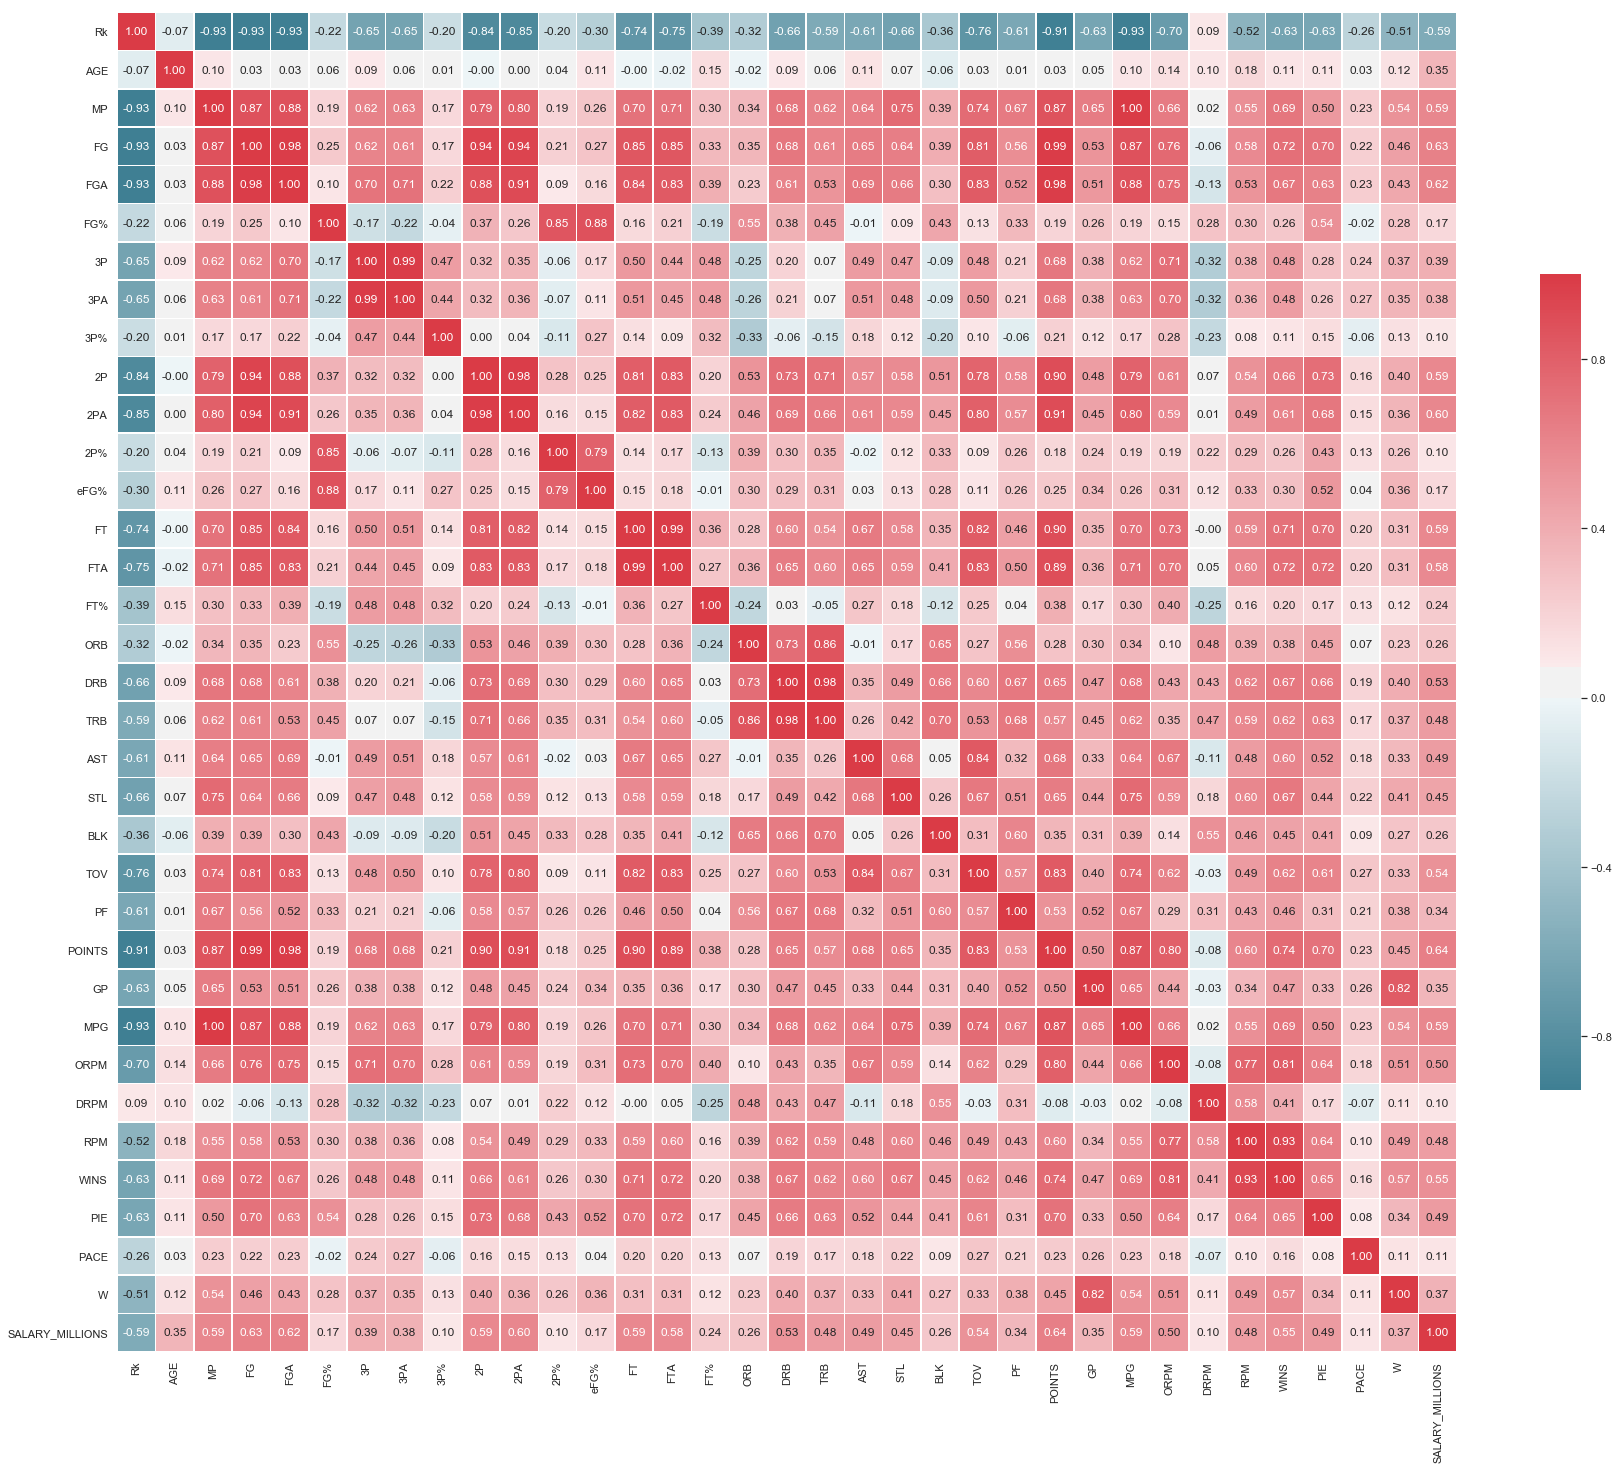

In [12]:
sns.set(style="white")

players_corr = players_df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(players_corr, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt=".2f")

# Euclidean Distance between players

## Euclidean Distance based on Player Abilities

In [13]:
##Euclidean Distance between two players based on their abilities

In [14]:
#Import Euclidean Distance Packages
from sklearn.preprocessing import normalize

from scipy.spatial.distance import pdist, squareform

In [15]:
#normalize vector for each player 
norm_df = pd.DataFrame(normalize(players_df[['Rk', 'AGE', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'GP',
       'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS', 'PIE', 'PACE', 'W',
       'SALARY_MILLIONS']] , axis=1, copy=True, return_norm=False))

In [16]:
#Calculate Euclidean Distance between each player

dist = pdist(norm_df, 'euclidean')
dis_df = pd.DataFrame(squareform(dist))

In [17]:
dis_df.set_index(players_df["PLAYER"],inplace = True)

In [18]:
dis_df.columns = list(dis_df.index)

In [19]:
dis_df.head(10)

,Russell Westbrook,James Harden,Isaiah Thomas,Anthony Davis,DeMarcus Cousins,Damian Lillard,LeBron James,Kawhi Leonard,Stephen Curry,Kyrie Irving,...,Deyonta Davis,Ryan Kelly,Jordan Mickey,Mike Miller,Diamond Stone,Brice Johnson,Mike Tobey,Alonzo Gee,John Lucas III,Aaron Harrison
PLAYER,,,,,,,,,,,,,,,,,,,,,
Russell Westbrook,0.000000,0.088018,0.172773,0.134549,0.123143,0.110094,0.114342,0.132844,0.197491,0.153135,...,1.263146,1.284442,1.276995,1.270264,1.300399,1.302263,1.305594,1.285730,1.303787,1.310135
James Harden,0.088018,0.000000,0.144685,0.183660,0.164245,0.112428,0.106135,0.102565,0.148621,0.130204,...,1.257108,1.279882,1.272127,1.265481,1.295558,1.298435,1.300996,1.280982,1.299512,1.305487
Isaiah Thomas,0.172773,0.144685,0.000000,0.215845,0.180480,0.152635,0.203247,0.123804,0.130572,0.112008,...,1.247636,1.270745,1.262756,1.256325,1.286336,1.289459,1.291878,1.271212,1.290264,1.296524
Anthony Davis,0.134549,0.183660,0.215845,0.000000,0.069305,0.120497,0.178080,0.188129,0.262381,0.172884,...,1.245180,1.264728,1.257431,1.250981,1.280722,1.282384,1.284815,1.265452,1.284922,1.290687
DeMarcus Cousins,0.123143,0.164245,0.180480,0.069305,0.000000,0.097237,0.173463,0.174089,0.236814,0.150874,...,1.232131,1.251630,1.244382,1.237257,1.267969,1.269660,1.272040,1.252031,1.271539,1.277794
Damian Lillard,0.110094,0.112428,0.152635,0.120497,0.097237,0.000000,0.130075,0.133267,0.193913,0.092951,...,1.228235,1.249169,1.241613,1.234622,1.265242,1.267726,1.269801,1.249727,1.269171,1.275220
LeBron James,0.114342,0.106135,0.203247,0.178080,0.173463,0.130075,0.000000,0.113141,0.174962,0.147577,...,1.229345,1.250882,1.243848,1.235938,1.267000,1.269409,1.271427,1.251934,1.270120,1.276788
Kawhi Leonard,0.132844,0.102565,0.123804,0.188129,0.174089,0.133267,0.113141,0.000000,0.092109,0.097909,...,1.218772,1.242691,1.234734,1.228231,1.258615,1.261703,1.264325,1.243865,1.262807,1.268998
Stephen Curry,0.197491,0.148621,0.130572,0.262381,0.236814,0.193913,0.174962,0.092109,0.000000,0.140068,...,1.215793,1.240652,1.232505,1.225931,1.256103,1.259899,1.262570,1.241420,1.260423,1.266609


In [20]:
#sns.heatmap(dis_df, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt=".2f")

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


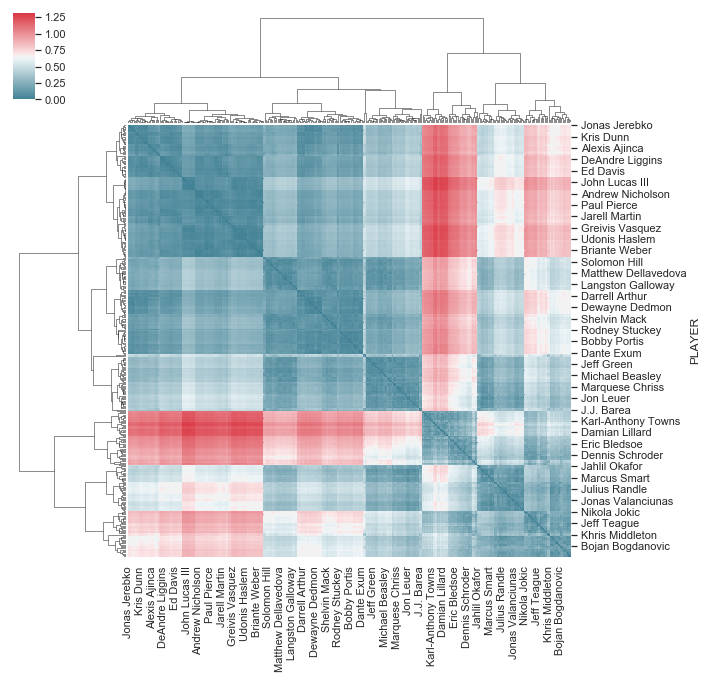

In [21]:
sns.clustermap(dis_df,cmap=cmap)

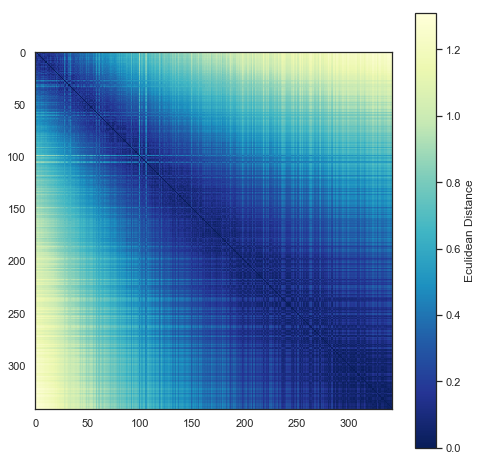

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(dis_df, cmap='YlGnBu_r')
cbar = plt.colorbar()
cbar.set_label('Eculidean Distance')

## Pair the players with most similar abilities

In [23]:
closest = np.where(dis_df.eq(dis_df[dis_df != 0].min(),0),dis_df.columns,False)
# Remove false from the array and get the column names as list
close_player_df = pd.DataFrame()
close_player_df["PLAYER"] = players_df["PLAYER"]
close_player_df['CLOSE_PLAYER_ABILITY'] = [i[i.astype(bool)].tolist() for i in closest]

In [24]:
close_player_df.head(10)

,PLAYER,CLOSE_PLAYER_ABILITY
0,Russell Westbrook,[James Harden]
1,James Harden,[Russell Westbrook]
2,Isaiah Thomas,[Kyrie Irving]
3,Anthony Davis,[DeMarcus Cousins]
4,DeMarcus Cousins,[Anthony Davis]
5,Damian Lillard,[Paul George]
6,LeBron James,[James Harden]
7,Kawhi Leonard,[Stephen Curry]
8,Stephen Curry,[Kawhi Leonard]
9,Kyrie Irving,[Bradley Beal]


## Hierarchical Dendrogram

In [25]:
import scipy.cluster.hierarchy as hac

In [26]:
cluster_hac = hac.linkage(norm_df,method="ward")

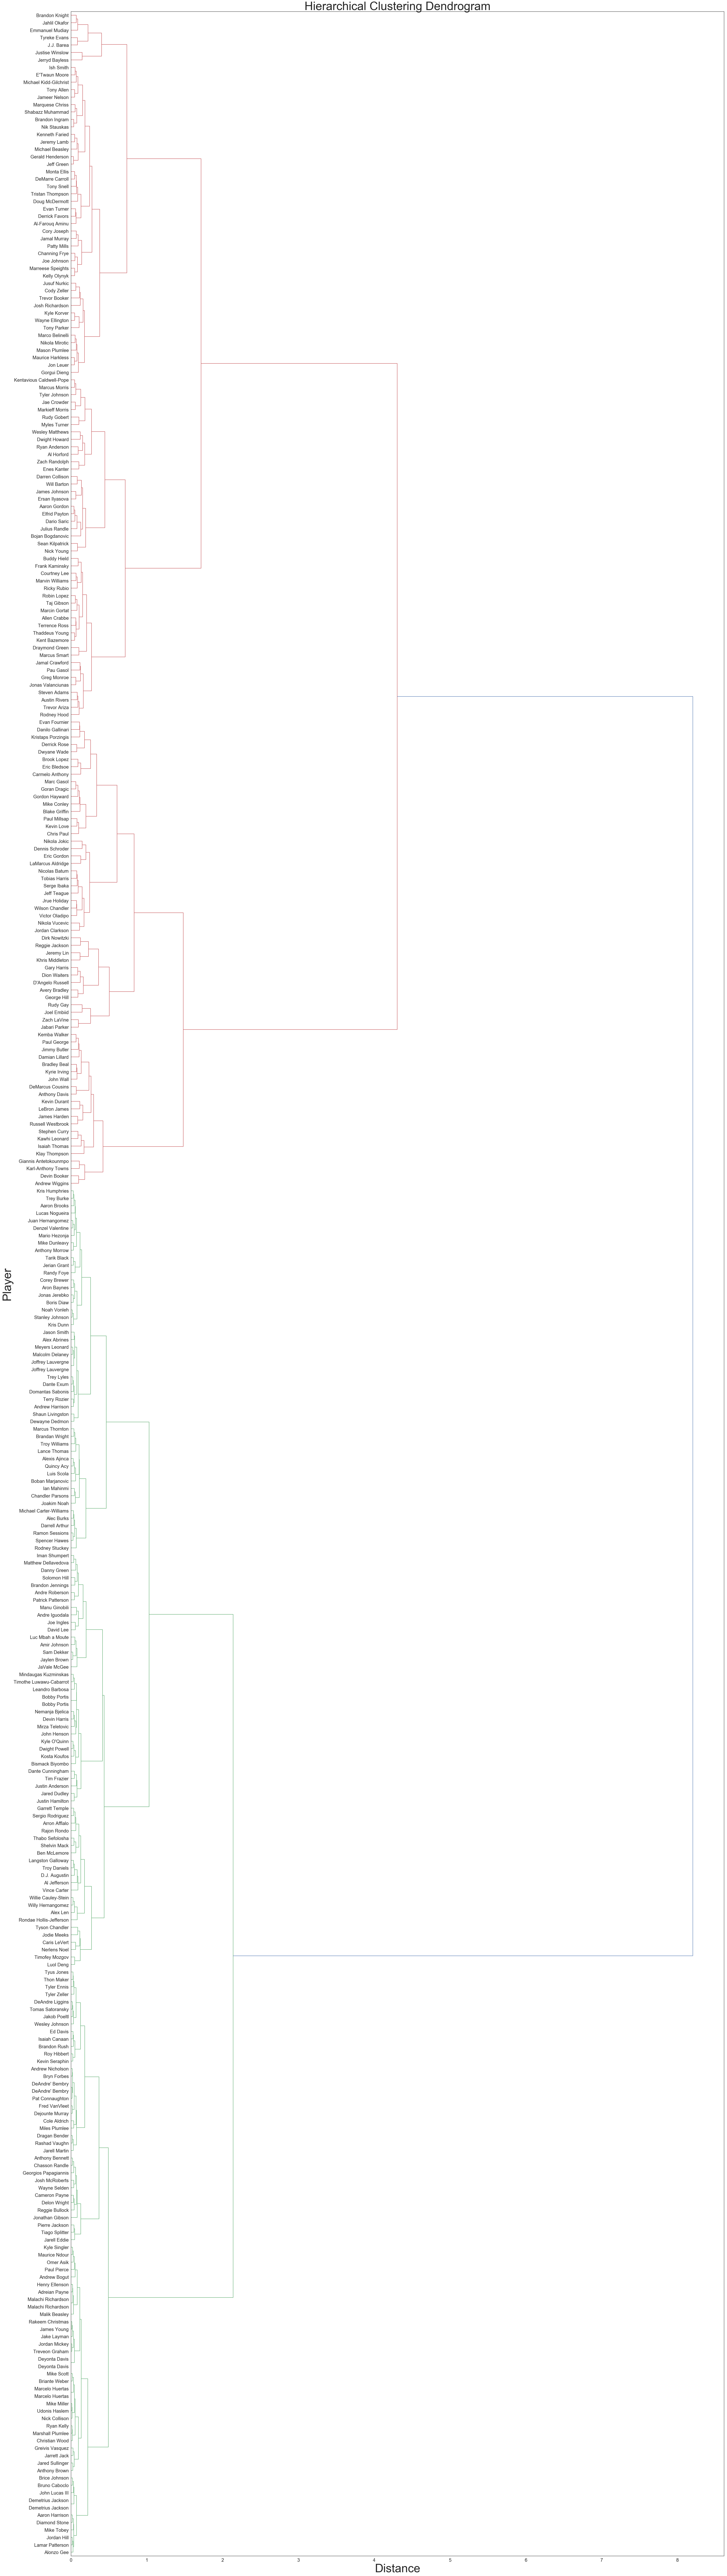

In [27]:
plt.figure(figsize=(50, 200))
dendogram = hac.dendrogram(cluster_hac, leaf_font_size=50,orientation='right',show_leaf_counts = True,show_contracted=True,labels=dis_df.index)
plt.title('Hierarchical Clustering Dendrogram', fontsize=50)
plt.xlabel('Distance', fontsize=50)
plt.ylabel('Player', fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Clustering Models

## Import ML Packages

In [28]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

from sklearn.mixture import GaussianMixture #For GMM clustering

## KNN Clustering Method

In [29]:
#Determine the number of Clusters

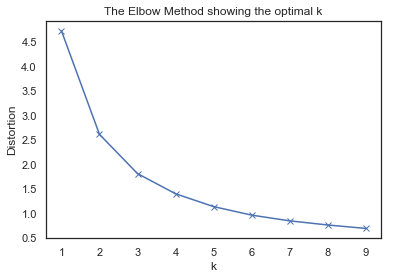

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dis_df)
    kmeanModel.fit(dis_df)
    distortions.append(sum(np.min(cdist(dis_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dis_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [31]:
#k = 3

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(dis_df)
kmeans_df = pd.DataFrame(kmeans.labels_)
players_df.insert((players_df.shape[1]),'kmeans',kmeans_df)

In [33]:
players_df.head(10)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,MPG,ORPM,DRPM,RPM,WINS,PIE,PACE,W,SALARY_MILLIONS,kmeans
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,1
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,1
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,1
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,1
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,1
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,1
6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96,1
7,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,...,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64,1
8,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,...,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11,1
9,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,...,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64,1


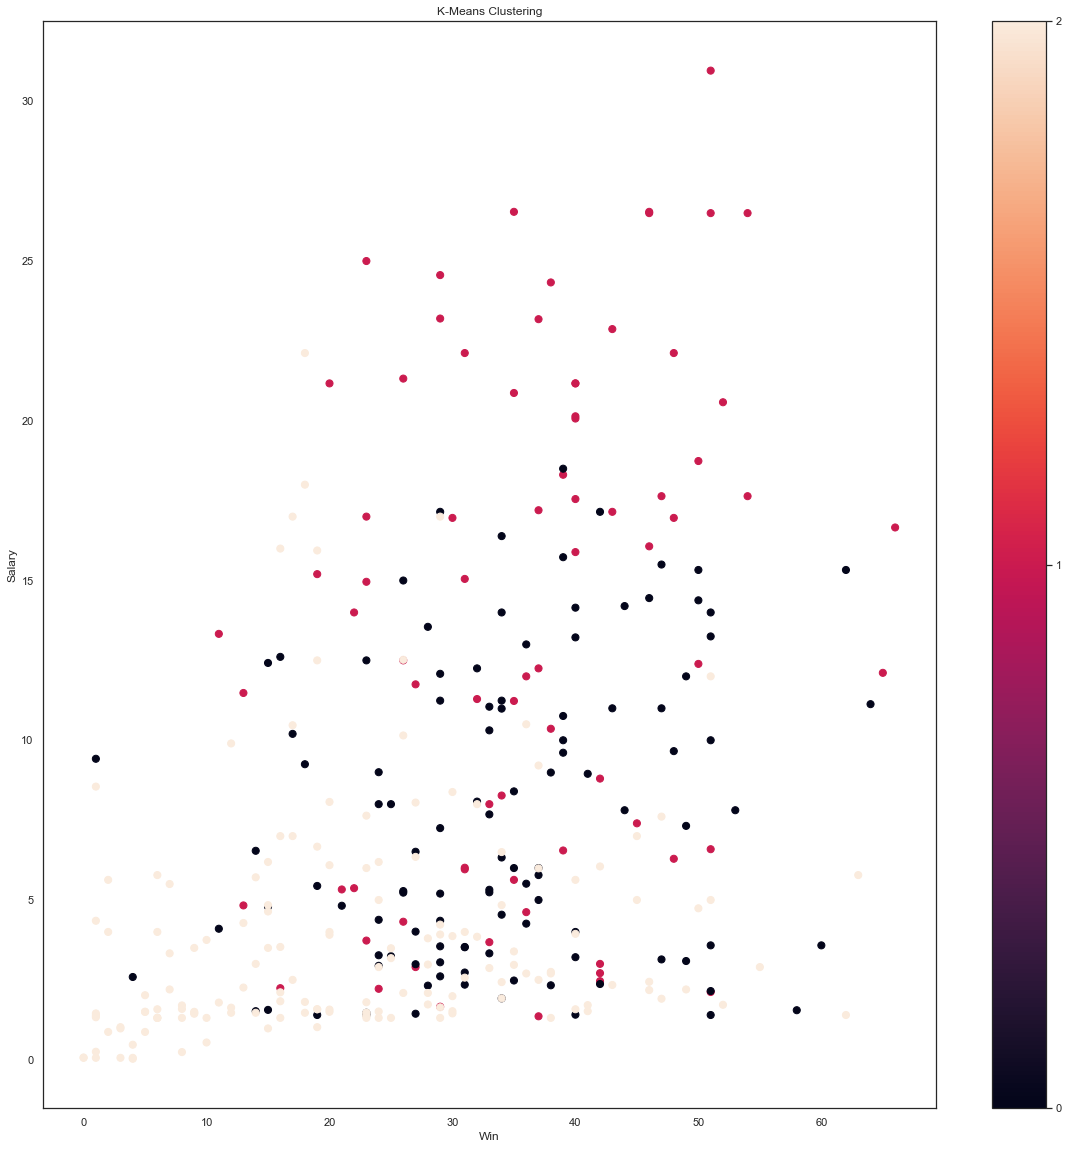

In [34]:
plt.figure(figsize=(20, 20))
scatter = plt.scatter(players_df['W'],players_df["SALARY_MILLIONS"],
                     c=kmeans_df[0],s=50)
plt.title('K-Means Clustering')
plt.xlabel('Win')
plt.ylabel('Salary')
plt.colorbar(scatter,ticks=np.linspace(0,3,4))

## Agglomerative Clustering Method

In [35]:
Agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward').fit_predict(dis_df)

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\scipy\cluster\hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [36]:
Agg_df = pd.DataFrame(Agg)
players_df.insert((players_df.shape[1]),'AgglomerativeClustering',Agg_df)

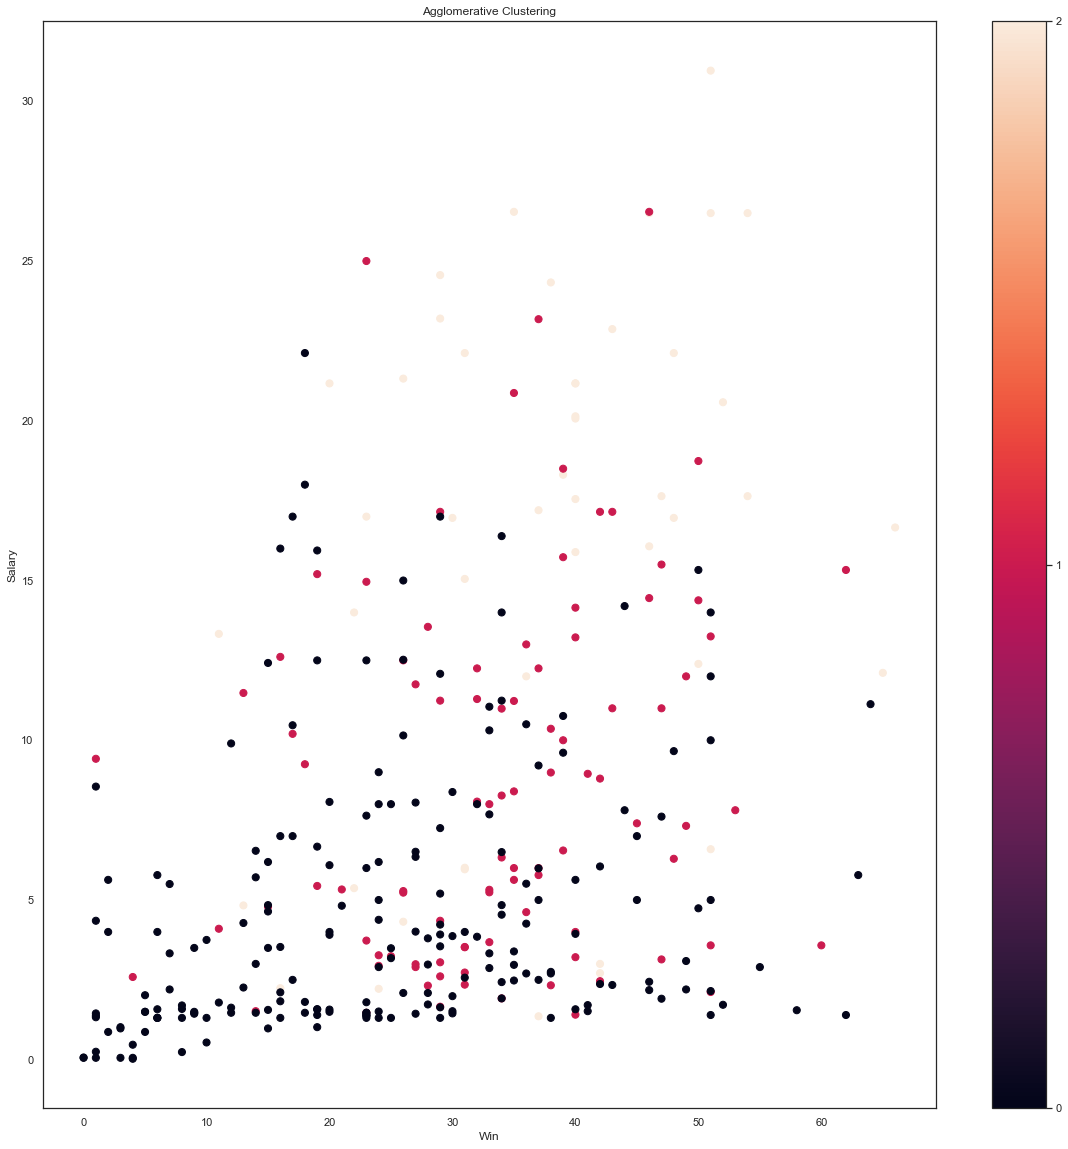

In [37]:
plt.figure(figsize=(20, 20))
scatter = plt.scatter(players_df['W'],players_df["SALARY_MILLIONS"],
                     c=Agg_df[0],s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Win')
plt.ylabel('Salary')
plt.colorbar(scatter,ticks=np.linspace(0,3,4))


## Gaussian Mixture Model

In [38]:
gau_model = GaussianMixture(n_components=3,init_params='kmeans')
gau_model.fit(dis_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [39]:
gau_label = gau_model.predict(dis_df)

In [40]:
gau_df = pd.DataFrame(gau_label)
players_df.insert((players_df.shape[1]),'gmm',gau_df)

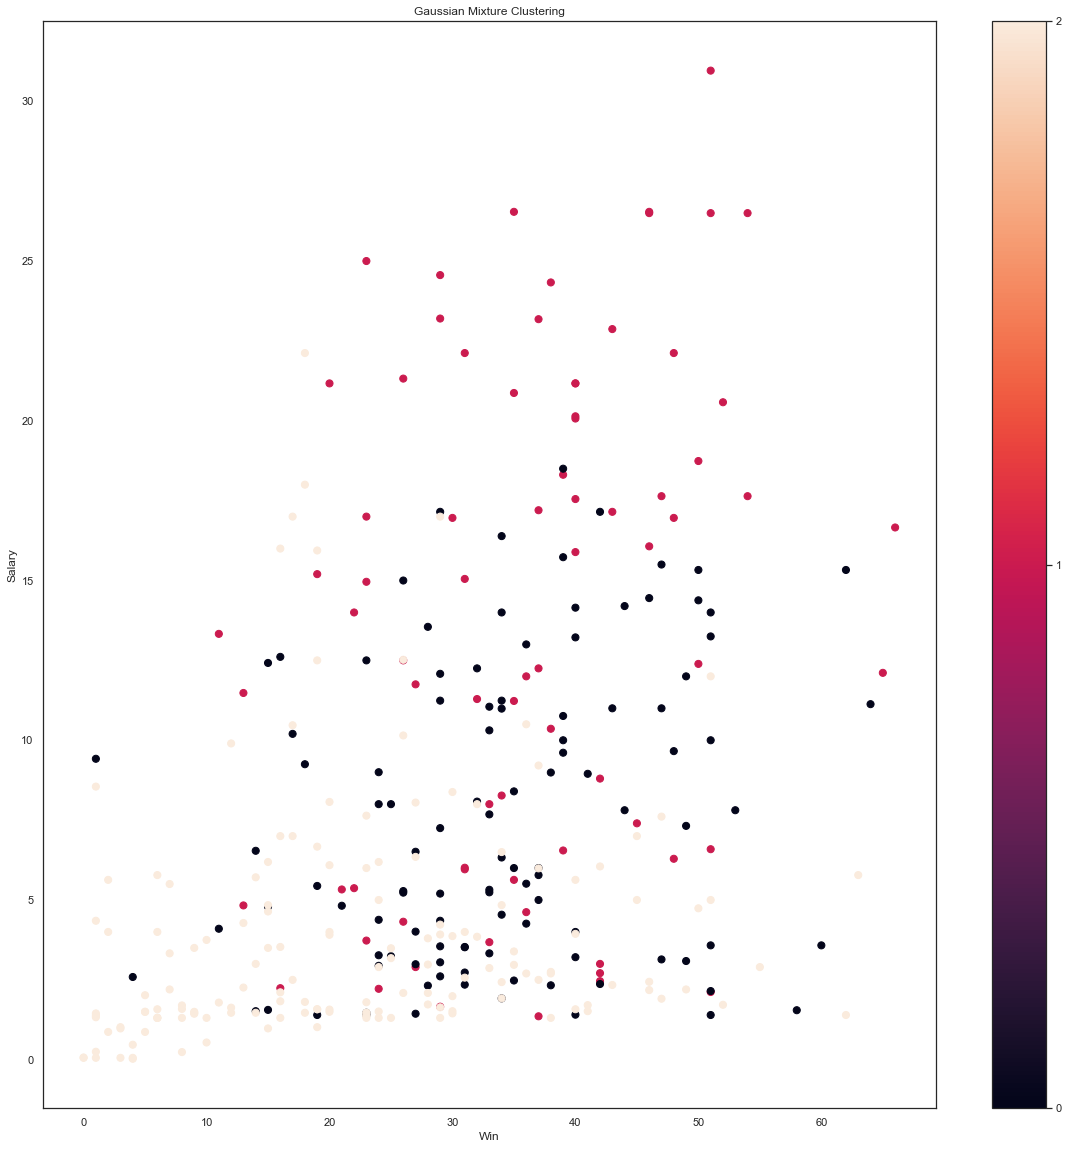

In [41]:
plt.figure(figsize=(20, 20))
scatter = plt.scatter(players_df['W'],players_df["SALARY_MILLIONS"],
                     c=gau_df[0],s=50)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Win')
plt.ylabel('Salary')
plt.colorbar(scatter,ticks=np.linspace(0,3,4))
